In [2]:
"""
import modules
"""

from prepare_data import prepare_df_from_mac_5_year as prepare_CCL
from prepare_data import prepare_paths as prepare_paths
from emulate_reduction import emulator_v4 as emulate
from visualize_output import vis_emulator_v1 as v1_plot
from pym import pym

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

dir(prepare_paths)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'colors',
 'combine_azure_ctax',
 'np',
 'os',
 'output_costs_timer',
 'pd',
 'plot_MAC',
 'plt',
 'prepare_data',
 'pym',
 'truncate_colormap',
 'world_MAC_data']

In [3]:
"""
IAMC database 
"""

FILENAME_IAMC = 'iamc15_scenario_data_world_r2.0.xlsx'
FILENAME_MEAN_TEMP = 'mean_temp.csv'

PATH_IAMC = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths/'
PATH_IAMC_MYM = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_mym/'
PATH_IAMC_CSV = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_csv/'
PATH_RANDOM_SCALED = 'C:/Users/toonv/Documents/PBL/Data/random_scaled_mym/'

# new paths, from IAMC databese
IAMC_database = pd.read_excel(PATH_IAMC + FILENAME_IAMC, sheet_name='data')

C:\Users\toonv\Documents\PBL\Code\Emulator\prepare_data\prepare_paths.py:193: RuntimeWarning: invalid value encountered in true_divide
  norm_ctax = self.values_only.values / self.final_ctax[:, None]


50
958


,2020,2030,2040,2050,2060,2070,2080,2090,2100
953,0.0,0.0,254.242545,557.801337,421.149177,721.195786,1760.0,946.597027,179.332835
954,0.0,0.0,265.799024,583.155943,440.292321,753.977412,1840.0,989.624164,187.484327
955,0.0,0.0,277.355503,608.510549,459.435466,786.759039,1920.0,1032.651302,195.635820
956,0.0,0.0,288.911983,633.865155,478.578610,819.540665,2000.0,1075.678439,203.787312
957,0.0,0.0,300.468462,659.219762,497.721755,852.322292,2080.0,1118.705577,211.938805


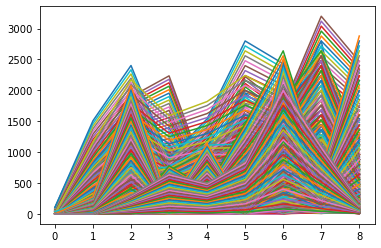

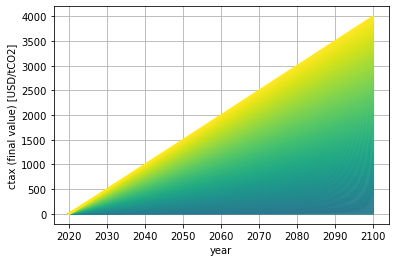

In [5]:
"""
prepare data from IAMC database
"""

reload(prepare_paths)

YEAR_STEP = 10
MAX_CTAX = 4000
MODELS = ['IMAGE']
STEP_CTAX = 200
STEP_CTAX_LIN_PATHS = 20
MAX_RAND = 2

raw_data = prepare_paths.prepare_data(IAMC_database)

carbon_prices, models_ctax = raw_data.filter_iamc(YEAR_STEP, 'Price|Carbon', MAX_CTAX, MODELS)
# mean_temp, models_temp = raw_data.filter_iamc(year_step, 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED',
#                                               MAX_CTAX, MODELS)

# scaled and lin ctax
scaled_ctax_paths = raw_data.scale_ctax(STEP_CTAX)
lin_ctax_paths = raw_data.get_linear(MAX_CTAX, STEP_CTAX_LIN_PATHS)
# sparse_ctax_paths = raw_data.sparse_linear(MAX_CTAX)
random_ctax_paths = raw_data.get_random(MAX_RAND, MAX_CTAX)
# cubic_ctax_paths = raw_data.get_cubic(MAX_CTAX)
# cubicroot_ctax_paths = raw_data.get_cubicroot(MAX_CTAX)
# sparse_cubicroot_paths = raw_data.sparse_cubicroot(MAX_CTAX)
# sparse_cubic_paths = raw_data.sparse_cubic(MAX_CTAX)
scaled_random = raw_data.scaled_random(STEP_CTAX_LIN_PATHS)

# merged dataframe
# all_paths = raw_data.merge_all(PATH_IAMC, 'all_ctax_paths.xlsx')
raw_data.plot_ctax_paths(lin_ctax_paths, colormap=None)

# ctaxes = [scaled_ctax_paths, random_ctax_paths, lin_ctax_paths, sparse_ctax_paths, cubic_ctax_paths, sparse_cubic_paths,
#          cubicroot_ctax_paths, sparse_cubicroot_paths]

# for index, ctax in enumerate(ctaxes):
    
#     rows = len(ctaxes)/2
    
#     plt.subplot(rows,2,index + 1)
    
#     ctax.T.plot(legend=False, ax=plt.gca(), sharex='year', sharey='ctax [USD]', title=ctax.method, grid=True,
#                figsize=(10,15), ylabel='ctax [USD]', xlabel='year')

# save data to path
# raw_data.prepare_mym(scaled_random, PATH_RANDOM_SCALED, PATH_RANDOM_SCALED, 'ctax_train_')

scaled_random.tail()

In [57]:
current_scaled_paths = scaled_random
current_random = random_ctax_paths[:50].reset_index(drop=True)
df_max = current_scaled_paths.max(axis=1)
norm_df = current_scaled_paths.divide(df_max, axis=0)
norm_df = norm_df.round(decimals=3)

indices_paths = norm_df.drop_duplicates(keep='first').index
print(indices_paths)

# current_scaled_paths.to_excel('C:/Users/toonv/Documents/PBL/Data/random_scaled_mym/' + 'scaled_random.xlsx')

Int64Index([  0,  12,  23,  36,  52,  65,  80,  92, 104, 120, 131, 140, 158,
            177, 186, 194, 209, 227, 236, 244, 250, 268, 279, 291, 303, 313,
            330, 343, 360, 380, 398, 415, 430, 450, 478, 496, 533, 561, 590,
            628, 656, 686, 709, 730, 761, 779, 808, 829, 863, 899],
           dtype='int64')


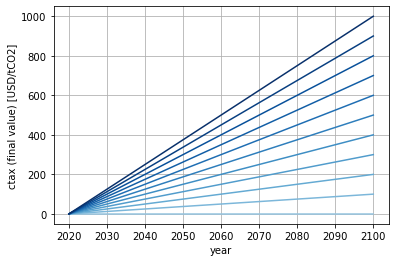

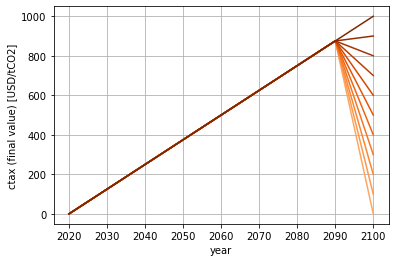

In [4]:
"""
Dataframe for costs experiment
"""

MAX_CTAX_COSTS = 1000
STEP_CTAX_COSTS = 100
LIN_PATH_COSTS = 'C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_paths'
TREE_PATH_COSTS = 'C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_paths'
PATH_COSTS_CSV = 'C:/Users/toonv/Documents/PBL/Data/costs_paths_csv/'

lin_ctax_paths_costs = raw_data.get_linear(MAX_CTAX_COSTS, STEP_CTAX_COSTS)
raw_data.plot_ctax_paths(lin_ctax_paths_costs, 'Blues')

tree_ctax_paths_costs = raw_data.get_tree_costs(MAX_CTAX_COSTS, STEP_CTAX_COSTS)
raw_data.plot_ctax_paths(tree_ctax_paths_costs, 'Oranges')

# raw_data.prepare_mym(lin_ctax_paths_costs, LIN_PATH_COSTS, PATH_COSTS_CSV, 'ctax_train_')
# raw_data.prepare_mym(tree_ctax_paths_costs, TREE_PATH_COSTS, PATH_COSTS_CSV, 'ctax_train_')

